In [1]:
import shutil
import tensorflow as tf
import numpy as np
import tensorflow_probability as tfp
import os 
import sys
import matplotlib.pyplot as plt
import pandas as pd
from pyDOE import lhs
%load_ext autoreload
%autoreload 2
import time


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.



In [2]:
tfm = tfp.models

In [3]:
inputs = np.loadtxt('./test_Data/X.txt')

In [4]:
outputs = np.loadtxt('./test_Data/Y.txt')

In [5]:
print(inputs.shape)

(100, 4)


In [6]:
labels = ['u1','u2', 'u3','u4']

In [7]:
model = tfm.BGP_model(inputs, outputs, kernel_type = 'RBF', noise_level = 1e-4, labels = labels)

In [8]:
sampling_info = model.run_mcmc(mcmc_samples = 4000, num_leapfrog_steps = 3, estimate_noise = False, warm_up = True)

Noise variance is fixed.
Excecuting the warmup.
Warmup: 
Warm-Up Iteration:   0 Acceptance Rate: 1.000
Warm-Up Iteration: 500 Acceptance Rate: 0.601
Warm-Up Iteration: 1000 Acceptance Rate: 0.579
Warm-Up Iteration: 1500 Acceptance Rate: 0.570
Warm-Up Iteration: 1999 Acceptance Rate: 0.567
Sampling in progress.


W0228 03:04:42.683073 139794025441024 deprecation.py:323] From /root/.local/lib/python3.5/site-packages/tensorflow_probability/python/models/bayesgp/scripts/bayesiangp.py:234: to_float (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.cast instead.


Acceptance rate of the HMC sampling: 0.5295


In [10]:
model = tfm.BGP_model(inputs, outputs, kernel_type = 'RBF', noise_level = 1e-4, labels = labels, sampling_info = sampling_info)

Retrieving hyperparameter samples


In [11]:
model.plot_chains(directory_path  = './results/plain_gp/')

In [12]:
mean_pos, std_pos, samples = model.predict(inputs, with_point_samples = True)

In [13]:
lower = np.percentile(samples,2.5, axis = 0)
upper = np.percentile(samples,97.5, axis = 0)

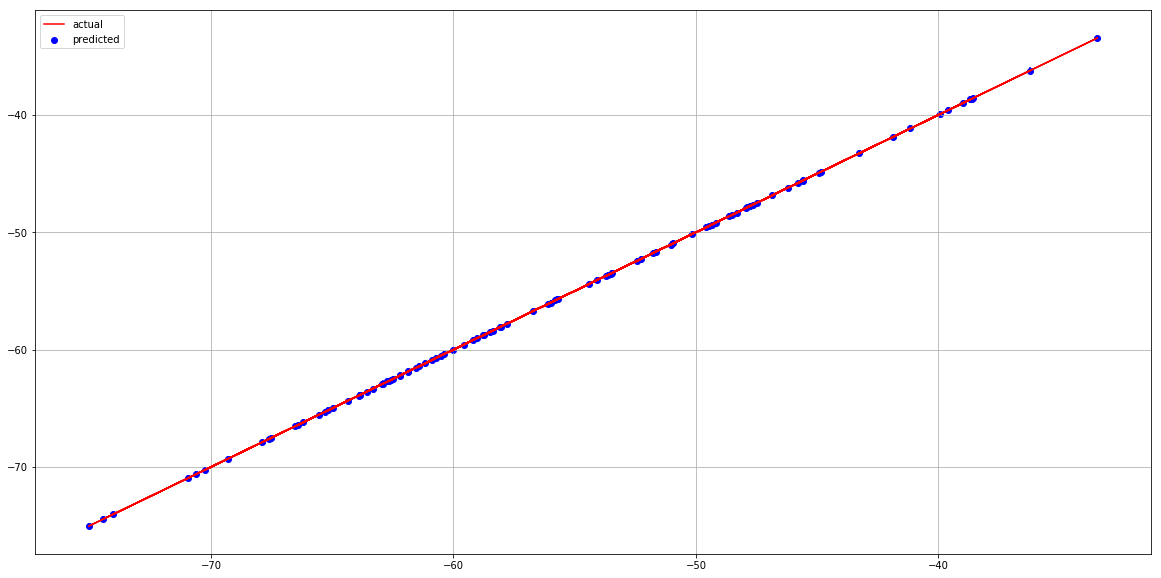

In [14]:
# Predicted vs actual
plt.figure(figsize =(20,10))
plt.plot(outputs, outputs , color = 'red', label ='actual')
plt.scatter(outputs, mean_pos, color = 'blue', label = 'predicted')
plt.vlines(outputs,lower, upper, color = 'blue')
plt.legend()
plt.grid()

In [15]:
path1 = './results/plain_gp/'
path2 = './results/plain_gp/surfaces/'
main, interaction = model.maineffect_and_interaction(directory_path1 = path1, directory_path2 = path2, create_plot = True)

In [16]:
print(interaction.keys())

dict_keys(['u1 || u2', 'u2 || u4', 'u1 || u4', 'u1 || u3', 'u3 || u4', 'u2 || u3'])


In [17]:
Sobol = model.sobol_indices(directory_path = path1)

Sampling matrix generated


In [18]:
print(Sobol)

{'u4': 0.41093203, 'u1 || u2': 0, 'u2 || u4': 0.013287038, 'u1 || u4': 0.015241325, 'u1 || u3': 0, 'u2': 0.01639531, 'u3 || u4': 0.040016174, 'u1': 0.35460064, 'u2 || u3': 0.0069772936, 'u3': 0.04462081}


In [19]:
Sobol = model.sobol_indices(max_order = 3, S = Sobol, directory_path = path1)

Initial number of Sobol computations:  14
New number of Sobol computations:  4
Sampling matrix generated


In [20]:
Sobol_total = model.total_sobol_indices(directory_path = path1)

In [21]:
print(Sobol_total)

{'u4': 0.5769171, 'u1': 0.4523281, 'u2': 0.07068682, 'u3': 0.18789792}
